# Dimensionality Reduction and Binary Classifiers 

This exercise shows how dimensionality reduction (PCA) affects the accuracy of SVM and Logistic Regression classifiers

The data set is from UCI Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Title: Wisconsin Diagnostic Breast Cancer
    
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  
They describe characteristics of the cell nuclei present in the image.
568 observations. Diagnosis: benign or malignant

Column 1 = class label (malignant), 0 (benign)
Columns 2-31 = 30 features
31 features and 2 class labels  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Import data set
df = pd.read_csv('data_wdbc.csv')
df = df.values

X_df = df[:,1:]
y = df[:,0]

np.random.seed(1)
df.shape

(568, 31)

In [2]:
"""
  1. Dimensionality reduction with different number of principal components
  2. Split 80/20 training/test sets
  3. Perform 5-fold cross validation
  4. Find the average accuracy scores
"""

k_comp = [5, 10, 15, 20, 25, 30]  # number of pc's
clf_mean_scores = []
model2_mean_scores = []

for comp in k_comp:
    pca = decomposition.PCA(n_components=comp).fit(X_df)
    X = pca.transform(X_df)
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    ## SVM
    clf = svm.SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    clf_mean_scores.append(np.mean(scores))

    ## Logistic Regression
    model2 = LogisticRegression()
    scores = cross_val_score(model2, X_train, y_train, cv=5)
    model2_mean_scores.append(np.mean(scores))
    

(568, 5)
(568, 10)
(568, 15)
(568, 20)
(568, 25)
(568, 30)


In [3]:
# Compare SVM and logistic regression accuracy for different number of principal components
for i in range(len(k_comp)):
    print(k_comp[i],clf_mean_scores[i],model2_mean_scores[i])

5 0.9428985507246377 0.9428985507246377
10 0.9493719806763286 0.9471980676328503
15 0.9603864734299516 0.9472463768115942
20 0.96256038647343 0.9515942028985508
25 0.96256038647343 0.9472463768115942
30 0.96256038647343 0.9472463768115942


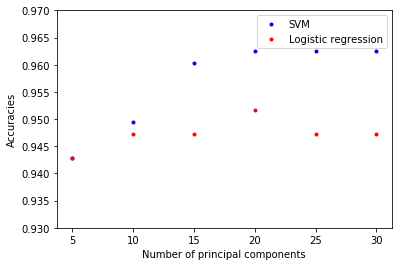

In [4]:

# Plot the results

import matplotlib.pyplot as plt
plt.ylim(0.93,0.97)
plt.plot(k_comp, clf_mean_scores,'b.', label='SVM')
plt.plot(k_comp, model2_mean_scores, 'r.', label='Logistic regression')
plt.xlabel('Number of principal components')
plt.ylabel('Accuracies')
plt.legend()
plt.show()